##디시 인사이드 크롤링

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
#메인 페이지 설정
DC_URL = "https://gall.dcinside.com/board/lists"

#크롤링 페이지 저장 형식 정리 (pandas)
list_index = ['제목', '글쓴이', '날짜', '조회수', '추천수']
list =[]

In [ ]:
#크롤링 페이지 수 정의
for num in range(1, 50):
    
#에러처리
    try:
        params = {'id': 'tea','page': f'{num}' }
        headers = { 'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'}
        resp = requests.get(DC_URL, params=params, headers=headers)
        soup = BeautifulSoup(resp.content, 'html.parser')
        contents = soup.find('tbody').find_all('tr')
        page_size = len(contents)
        
        for i in contents:
            line = []
            try:
                new_dict = {}
                
                #제목추출
                title_tag = i.find('a')
                title = title_tag.text
                line.append(title)
                
                #글쓴이 추출
                writer_tag = i.find('td', class_='gall_writer ub-writer').find('span', class_='nickname')
                try:
                    if writer_tag is not None:
                        writer = writer_tag.text
                        line.append(writer)
                        
                    else:
                        line.append('없음')
                except:
                    line.append('없음')
                
                # 날짜 추출 
                date_tag = i.find('td', class_='gall_date')
                date_dict = date_tag.attrs
                try:
                    if len(date_dict) is 2:
                        line.append(date_dict['title'])
    
                    else:
                        line.append(date_tag.text)
                except:
                    continue
                
                #조회수 추출
                views_tag = i.find('td', class_='gall_count')
                views = views_tag.text
                line.append(views)
                
                #추천수 추출
                recommend_tag = i.find('td', class_='gall_recommend')
                recommend = recommend_tag.text
                line.append(recommend)
                
                #리스트 파일로 저장
                list.append(line)
            except:
                continue
    except:
        continue
            
    resp.close()
    
    #데이터 저장처리 CSV
    df = pd.DataFrame(list, columns=list_index)
    df.to_csv('만우절 크롤링.csv', encoding = 'utf-8-sig')
    df.head()
    

In [ ]:
df_sample_01 = df[df["날짜"].str.contains('2021-04-01')] #만우절 부분만 선정
df_sample_01.head()

,제목,글쓴이,날짜,조회수,추천수
246,[질문] 드리퍼 '블루보틀 vs 칼리타 웨이브 스탠',우군,2021-04-01 23:51:25,261,0
247,아예 쌩 모르는 커린이 질문드립니다.,ㅇㅇㅇㅇ,2021-04-01 23:48:48,167,0
248,마누스+미뇽 사려눈데요,ㅇㅇ,2021-04-01 23:45:57,101,0
249,얼마전에 여자친구를 사귐.,Depresso,2021-04-01 23:41:42,316,0
250,트리콜 평가 내일 다시 합니다,리뷰만쓰는계정,2021-04-01 23:41:38,139,0


In [ ]:
#코랩 한글 폰트 사용
import matplotlib as mpl 
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
#주피터 한글 폰트 사용
from matplotlib import font_manager,rc
import matplotlib
import matplotlib.pyplot as plt

#폰트 경로
font_path = r #폰트 위치 입력
#폰트 이름 가져오기
font_name = font_manager.FontProperties(fname=font_path).get_name()
#폰트 설정
matplotlib.rc('font',family=font_name)

FileNotFoundError: ignored

In [ ]:
#조회수 타입 문자열인지 확인
df_sample_01["조회수"].dtypes

dtype('O')

In [ ]:
#시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package openjdk-7-jdk is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Package 'openjdk-7-jdk' has no installation candidate
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-dev is already the newest version (3.6.7-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
#조회수 시리즈 타입 숫자(int)로 변환
df_sample_02 = df_sample_01.astype({'조회수': int, '추천수' : int})

In [ ]:
#유동 지우기
df_sample_03 = df_sample_02[df_sample_02["글쓴이"] != 'ㅇㅇ']
df_sample_04 = df_sample_03.sort_values(by=["조회수"], ascending=False)

###만우절 하루 동안 쓰인 글 갯수는 몇개일까? 371
###만우절 하루 동안 얼마나 많은 사람이 글을 썼을까? 105 (유동제외)

In [ ]:
df_sample_01.describe()

###만우절 가장 신난 사람을 알아보자 == 나마리에 (16개 게시물)

In [ ]:
plt.figure(figsize=(50, 300))
plt.rc('font', size=40 )
#내림차순으로 넣는 방법 = order 부분 활용림차순으로 넣는 방법 = order 부분 활용
count_origin = df_sample_04["글쓴이"].value_counts()
g = sns.countplot(y = '글쓴이', data = df_sample_04, order = df_sample_04 [ '글쓴이' ]. value_counts (). index)
for i in range(count_origin.shape[0]):
    g.text(y=i, x=count_origin[i], s=count_origin[i], 
           horizontalalignment='center')
plt.title("만우절 가장 신난 사람")
plt.xticks(rotation = - 45 )
plt.show()


ValueError: ignored

<Figure size 36000x216000 with 1 Axes>

## 키워드 분석

In [ ]:
#텍스트 마이닝 라이브러리
!pip install nltk
from nltk.tokenize import word_tokenize
!apt-get install g++ openjdk-7-jdk
!apt-get install python3-dev; pip3 install konlpy

from konlpy.tag import Kkma       ; kkma = Kkma()
from konlpy.tag import Hannanum   ; hannanum = Hannanum()
from konlpy.tag import Okt        ; t = Okt()

from konlpy.tag import *

import pickle
import nltk

## 만우절 가장 추천이 높았던 썰을 알아보자 (추천수 가장 높은 것 == 공감이 많이 갔다고 생각)

In [ ]:
df_sample_04.sort_values(by=["추천수"], ascending=False)[0:10]

,제목,글쓴이,날짜,조회수,추천수
555,여기서 이런거도 취급해주시나요??,라디in,2021-04-01 09:32:32,735,21
592,부모님이랑 로스터리카페 열기로 했다,커잘알,2021-04-01 01:29:03,786,15
385,야발!!!!!!!!,도사자아아아아아앙,2021-04-01 17:33:34,504,13
308,일정한 압력 유지하기는 아람이 참 좋지,125.142,2021-04-01 21:02:30,493,13
605,바이럴해도 될까요? 미얀마 후원 되는 맹글라바 커피.,채권자A,2021-04-01 00:37:42,432,12
395,질문 받아요~,BB파비오,2021-04-01 17:06:51,411,8
487,결국 저울 질렀다,Rudbeckiaa,2021-04-01 13:36:25,477,8
567,속보)뉴비좆됨,차린이,2021-04-01 08:42:31,627,7
606,안녕 여러분. 로또에 당첨되었다. 최고의 머신 맥널티,바나나1리터,2021-04-01 00:36:17,515,7
349,만우절장난아님) 리도제작자 할배가 나눔이벤트한다,커잘알,2021-04-01 18:58:39,576,6


In [ ]:
#제목 단 리스트로 변환
df_sample_05 = df_sample_04.astype({'제목': str})
list_df_sample_05 = df_sample_05['제목'][0:100].values.tolist()
#list_df_sample_05

In [ ]:
morph_list = []
for i in list_df_sample_05:
    morphs = t.morphs(i)
    for morph in morphs:
        morph_list.append(morph)

In [ ]:
#불용어 처리
stop_words = [')','?','1','"(', '_', ')/','\n','.',',', '<','!','(','(', '??','..', '4', '|', '>', '?(', '"…', '#', '&', '・', "']",'.',' ','/',"'",'’','”','“','·', '[','!','\n','·','‘','"','\n ',']',':','…',')','(','-', 'nan','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
              '이다','하고','입니다','대한','에서','수사','심의',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','라고','중요한','합','가요','....','보이','네','무지',
             '적', '성', '삼', '등', '전', '인', '그', '했다', '와', '위', '해', '권', '된', '서', '말', '분']

morph_list = [each_word for each_word in morph_list
             if each_word not in stop_words]

ko = nltk.Text(morph_list)
ko.vocab().most_common(5)

[('트리', 16), ('콜', 16), ('커피', 8), ('타케시', 8), ('후기', 7)]

##만우절 최강의 어그로 키워드는 무엇일까? (조회수 높은 것들 1~100까지)

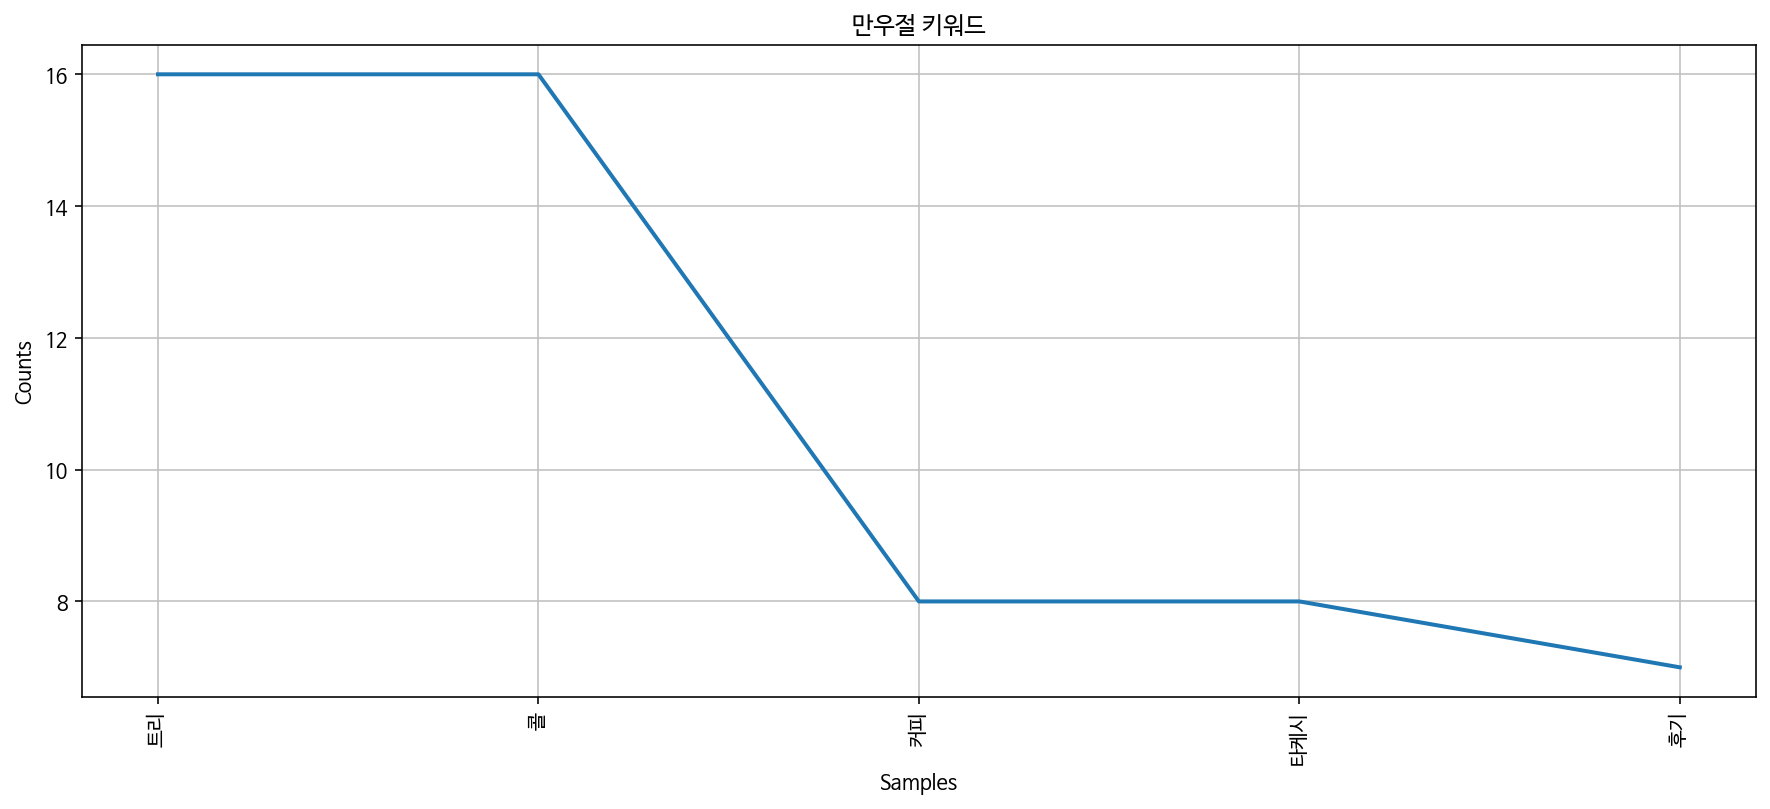

In [ ]:
plt.figure(figsize=(15,6))
plt.rc('font', size=10 )
plt.title("만우절 키워드")
plt.xticks(rotation = -45 )
ko.plot(5) 
plt.show()

## 만우절 하루 동안 있었던 일은 무엇일까? (유동 포함 가장 많이 나온 제목 키워드)

In [ ]:
#리스트로 변환
df_sample_06 = df_sample_01.astype({'제목': str})
list_df_sample_06 = df_sample_06['제목'].values.tolist()

morph_list_2 = []
for i in list_df_sample_06:
    morphs = t.morphs(i)
    for morph in morphs:
        morph_list_2.append(morph)

morph_list_2 = [each_word for each_word in morph_list_2
             if each_word not in stop_words]

ko = nltk.Text(morph_list_2)
ko.vocab().most_common(5)

[('트리', 39), ('콜', 39), ('커피', 29), ('타케시', 16), ('후기', 16)]

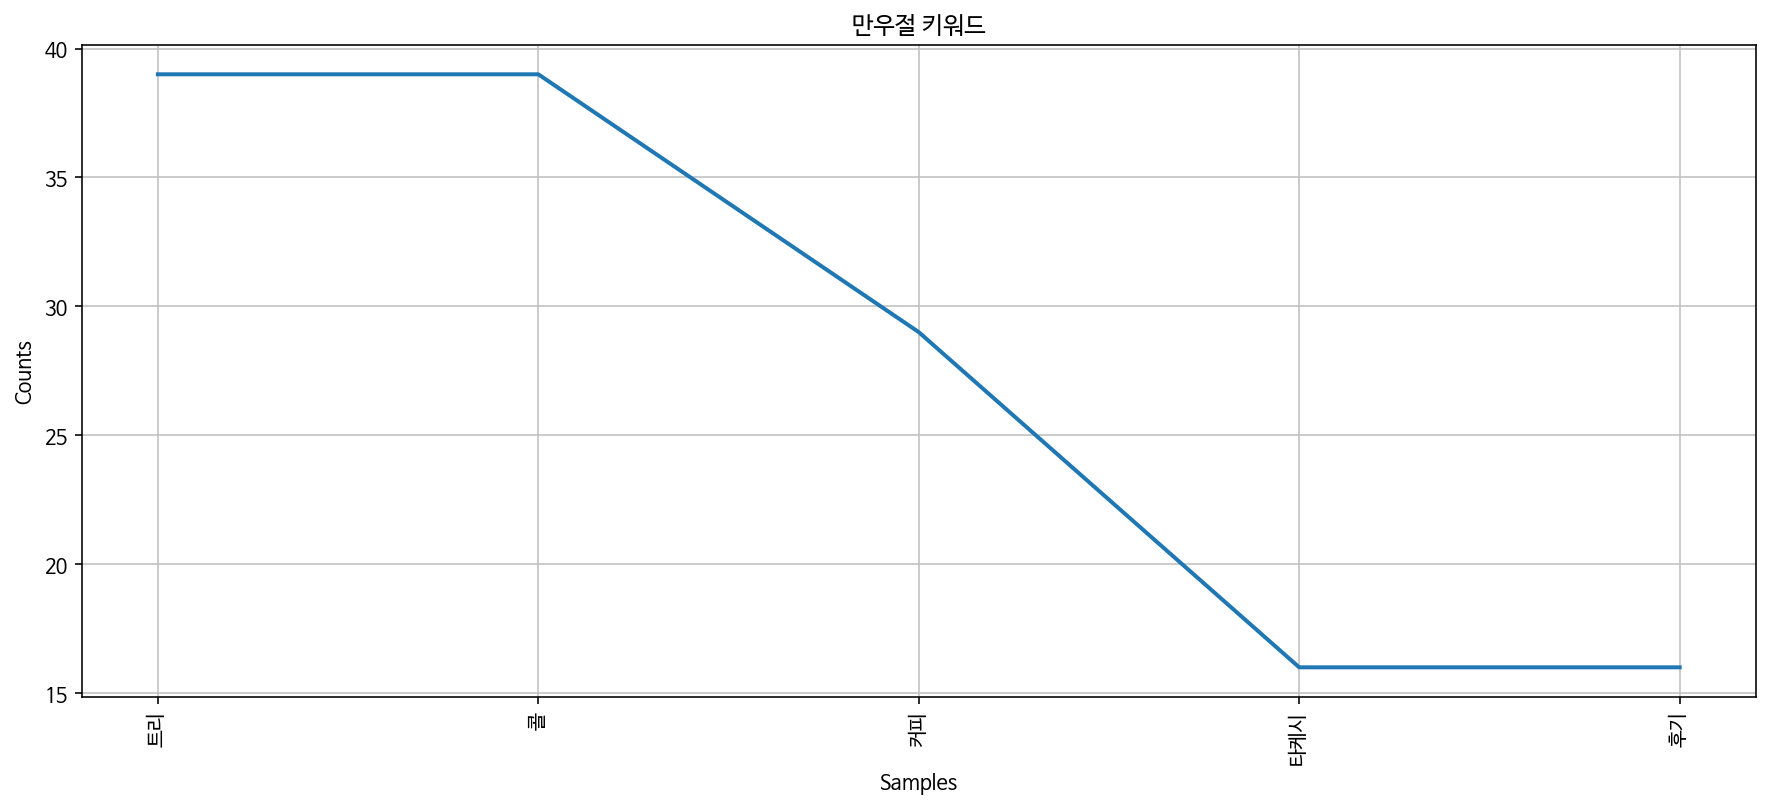

In [ ]:
#만우절 하루 동안 있었던 일은 무엇일까? (가장 많이 나온 제목 키워드)
plt.figure(figsize=(15,6))
plt.rc('font', size=10 )
plt.title("만우절 키워드")
plt.xticks(rotation = -45 )
ko.plot(5) 
plt.show()